
# Investigate a Dataset: FBI Gun Data 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The directing questions for this investigation will be as follows:

1. What census data is most associated with high gun per capita? 

2. Which states have had the highest growth in gun registrations, and which ? 

3. What is the overall trend of gun purchases?

4. In states with the highest percentage of gun registration, what is the racial demographic breakdown? 

5. Does the percentage of college educated individuals in a given state impact the percentage of gun registrations?


>For this explatory data analysis, I have elected to analyze US Census Data alongside FBI Gun Data which tracks the 
>number of gun registrations by state from 1968-2017. In analyzing this data, I will aim to answer the above questions while also tracking all of the steps in data wrangling, data cleaning, and exploratory analysis. This analysis we rely on the use of statistical analysis and visualizations to derive insights from these datasets. 
>

In [384]:
# Use this cell to set up import statements for all of the packages that we will be using.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, we will load in the data, check for cleanliness, and then trim and clean our dataset for analysis.

### General Properties

In [430]:
# load in datasets using pandas csv reader 
df_gun = pd.read_csv('gun-data.csv')
df_census = pd.read_csv('u.s.-census-data.csv')

In [431]:
#check the number of values in each column for a certain row in our dataset to check for missing data 
df_gun.iloc[5000]

month                         2010-03
state                        Virginia
permit                              0
permit_recheck                    NaN
handgun                         18718
long_gun                        11119
other                               0
multiple                          379
admin                               0
prepawn_handgun                     0
prepawn_long_gun                    0
prepawn_other                       0
redemption_handgun                  0
redemption_long_gun                 0
redemption_other                    0
returned_handgun                  NaN
returned_long_gun                 NaN
returned_other                    NaN
rentals_handgun                   NaN
rentals_long_gun                  NaN
private_sale_handgun              NaN
private_sale_long_gun             NaN
private_sale_other                NaN
return_to_seller_handgun          NaN
return_to_seller_long_gun         NaN
return_to_seller_other            NaN
totals      

The gun data dataframe below contains a series of columns that denote specifc permits that were extended for various types of guns, rentals, private sales and more. Realistically all of this additional data is not going to be particularly useful in our analysis moving forward. Columns that will remain for our analysis will be month, year, state, and totals. These excess columns will be removed in the data cleaning process. Additionally, we will want to parse the month/year data and create a seperate column for month and year. 

In [432]:
df_gun.head(3)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394


Below we are checking the number of states in the gun dataframe so that we can check against the number of states in the census dataframe to ensure that they match. 

In [433]:
#create a list of unique index values from the gun dataframe to see what states are included 
index_gun_state = df_gun.groupby('state').sum().index
index_gun_state

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia',
       'Guam', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
       'Kentucky', 'Louisiana', 'Maine', 'Mariana Islands', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri',
       'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey',
       'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio',
       'Oklahoma', 'Oregon', 'Pennsylvania', 'Puerto Rico', 'Rhode Island',
       'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah',
       'Vermont', 'Virgin Islands', 'Virginia', 'Washington', 'West Virginia',
       'Wisconsin', 'Wyoming'],
      dtype='object', name='state')

In [434]:
len(index_gun_state)

55

In [435]:
df_census.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


The "Fact Note" column from the census dataframe will be deleted considering the NaN values and the fact that it will not be necessary in our analysis. Just from looking at the data that was populated we can note that there are some datatype issues that need to be addressed such as floats where there should be percentages etc. but we will take a further look in a following cell. We can also note that in order to merge/match our gun info dataframe it will be neccessary to transpose the census data so that it aligns (states in one column as opposed to headers). 

In [436]:
df_gun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
month                        12485 non-null object
state                        12485 non-null object
permit                       12461 non-null float64
permit_recheck               1100 non-null float64
handgun                      12465 non-null float64
long_gun                     12466 non-null float64
other                        5500 non-null float64
multiple                     12485 non-null int64
admin                        12462 non-null float64
prepawn_handgun              10542 non-null float64
prepawn_long_gun             10540 non-null float64
prepawn_other                5115 non-null float64
redemption_handgun           10545 non-null float64
redemption_long_gun          10544 non-null float64
redemption_other             5115 non-null float64
returned_handgun             2200 non-null float64
returned_long_gun            2145 non-null float64
returned_other   

We can note that the month, and state columns both have incorrect data-types. Month should be data-type int and state should be data-type str (note: in the data cleaning process we will be adding in a column for year which will also be int). Additionally, there is a significant amount of missing data throughout the large majority of columns in this dataset. However, considering that we will be solely looking at the month, state, and totals columns, and they all have 12485 elements, we dont have to worry about missing or incorrect data in those columns. 

In [437]:
df_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 52 columns):
Fact              65 non-null object
Fact Note         16 non-null object
Alabama           65 non-null object
Alaska            65 non-null object
Arizona           65 non-null object
Arkansas          65 non-null object
California        65 non-null object
Colorado          65 non-null object
Connecticut       65 non-null object
Delaware          65 non-null object
Florida           65 non-null object
Georgia           65 non-null object
Hawaii            65 non-null object
Idaho             65 non-null object
Illinois          65 non-null object
Indiana           65 non-null object
Iowa              65 non-null object
Kansas            65 non-null object
Kentucky          65 non-null object
Louisiana         65 non-null object
Maine             65 non-null object
Maryland          65 non-null object
Massachusetts     65 non-null object
Michigan          65 non-null object
Minnesota

In regards to missing data, the census dataframe seems to be a lot neater, but, it will need to be restructured in a few different ways. We will be dropping the "Fact Note" column so there is no need to worry about missing data in that column. (Note: There is further investigation of this data that needs to be done but can only really be done once the data is transposed in order to see what "Fact" is and what data-type would be correct for that column. Because of that, I will do further investigation in the data cleaning section once the data has been restructured. 

Below we are checking the index in census dataframe to see the number of states against the gun dataframe to see if they match.

In [438]:
#create a list of unique index values from the census dataframe to see what states are included 
index_census_state = df_census.sum().index
index_census_state

Index(['Fact', 'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii',
       'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky',
       'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan',
       'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object')

In [439]:
len(index_census_state[1:])

50

As we can see based off the lenghts in each index count, there are a number of states in the gun dataframe that are not in the census data frame. Lets find out which ones. 

In [440]:
#loop through indexes from both dataframes simultaneously and print the values that are in the gun index but not census
for state in index_gun_state:
    if state not in index_census_state:
        print (state)  

District of Columbia
Guam
Mariana Islands
Puerto Rico
Virgin Islands


In the data cleaning section we will take care of this issue and remove these states from the gun dataframe

### Data Cleaning

Starting data cleaning process for the gun dataframe which will include, dropping columns we don't need, removing states that are not included in census data, fixing data-types, and parsing the month and year. 

In [441]:
#create a list of column names to drop
df_gun_drop = ['permit', 'permit_recheck', 'handgun', 'long_gun',
       'other', 'multiple', 'admin', 'prepawn_handgun', 'prepawn_long_gun',
       'prepawn_other', 'redemption_handgun', 'redemption_long_gun',
       'redemption_other', 'returned_handgun', 'returned_long_gun',
       'returned_other', 'rentals_handgun', 'rentals_long_gun',
       'private_sale_handgun', 'private_sale_long_gun', 'private_sale_other',
       'return_to_seller_handgun', 'return_to_seller_long_gun',
       'return_to_seller_other']

In [442]:
#drop all unecessary columns from our dataframe 
df_gun.drop(labels = df_gun_drop, axis = 1, inplace = True)

In [443]:
#Extract Year and months column based on Month in Gun data and convert data type from string to numeric 

#Assign the data before '-' in month column to year column
df_gun['year'] = df_gun['month'].apply(lambda x: x.split("-")[0]).astype(int)

#Assign the data after '-' in month column to month column
df_gun['month'] = df_gun['month'].apply(lambda x: x.split("-")[1]).astype(int)

In [444]:
#Make the state column the index values for gun dataframe 
df_gun.set_index('state', inplace = True)

In [445]:
#re-order columns 
df_gun_cols = ['month', 'year', 'totals']
df_gun = df_gun[df_gun_cols]

In [446]:
# delete the index column name 'state' that is not useful here
del df_gun.index.name

In [447]:
df_gun.head()

,month,year,totals
Alabama,9,2017,32019
Alaska,9,2017,6303
Arizona,9,2017,28394
Arkansas,9,2017,17747
California,9,2017,123506


In [448]:
#drop the states in df_gun that do not exist in the census dataframe so that they will both match 
df_gun.drop(['District of Columbia','Guam','Mariana Islands','Puerto Rico','Virgin Islands'], inplace = True)

In [449]:
#confirm that all data is in the correct data type and it is seeing that all values are of type int 
df_gun.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11350 entries, Alabama to Wyoming
Data columns (total 3 columns):
month     11350 non-null int64
year      11350 non-null int64
totals    11350 non-null int64
dtypes: int64(3)
memory usage: 354.7+ KB


In [450]:
#check 
len(df_gun.index.unique())

50

Starting data cleaning process for the census dataframe which will include, dropping columns we don't need, fixing data-types, and transposing the dataframe so that it matches the gun dataframe.

In [451]:
#drop fact note column from our dataframe 
df_census.drop(labels = 'Fact Note', axis = 1, inplace = True)

In [452]:
#transpose dataframe in order to make States index values 
df_census = df_census.transpose()

In [453]:
df_census.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2...","Population, percent change - April 1, 2010 (es...","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, ...","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016,...","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2...","Persons 65 years and over, percent, April 1, 2010",...,"All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",FIPS Code
Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,13.80%,...,"374,153","203,604","137,630","92,219","272,651","41,943","316,984",94.4,"50,645.33","""01"""
Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,7.70%,...,"68,032","35,402","22,141","13,688","51,147","7,953","56,091",1.2,"570,640.95","""02"""
Arizona,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,13.80%,...,"499,926","245,243","182,425","135,313","344,981","46,780","427,582",56.3,"113,594.08","""04"""
Arkansas,"2,988,248","2,916,025",2.50%,"2,915,918",6.40%,6.80%,23.60%,24.40%,16.30%,14.40%,...,"231,959","123,158","75,962","35,982","189,029","25,915","192,988",56,"52,035.48","""05"""


Make the "Fact" row in census dataframe the headers 

In [454]:
# Create a new variable called 'header' from the first row of the dataset
header = df_census.iloc[0]

In [455]:
# Replace the dataframe with a new one which does not contain the first row
df_census = df_census[1:]

In [456]:
# Rename the dataframe's column values with the header variable
df_census.rename(columns = header, inplace = True)

In [457]:
df_census.head(50)

,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, April 1, 2010",...,"All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",FIPS Code
Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,13.80%,...,"374,153","203,604","137,630","92,219","272,651","41,943","316,984",94.4,"50,645.33","""01"""
Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,7.70%,...,"68,032","35,402","22,141","13,688","51,147","7,953","56,091",1.2,"570,640.95","""02"""
Arizona,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,13.80%,...,"499,926","245,243","182,425","135,313","344,981","46,780","427,582",56.3,"113,594.08","""04"""
Arkansas,"2,988,248","2,916,025",2.50%,"2,915,918",6.40%,6.80%,23.60%,24.40%,16.30%,14.40%,...,"231,959","123,158","75,962","35,982","189,029","25,915","192,988",56,"52,035.48","""05"""
California,"39,250,017","37,254,522",5.40%,"37,253,956",6.30%,6.80%,23.20%,25.00%,13.60%,11.40%,...,"3,548,449","1,852,580","1,320,085","1,619,857","1,819,107","252,377","3,176,341",239.1,"155,779.22","""06"""
Colorado,"5,540,545","5,029,324",10.20%,"5,029,196",6.10%,6.80%,22.80%,24.40%,13.40%,10.90%,...,"547,352","284,554","194,508","85,849","442,365","51,722","469,524",48.5,"103,641.89","""08"""
Connecticut,"3,576,452","3,574,114",0.10%,"3,574,097",5.20%,5.70%,21.10%,22.90%,16.10%,14.20%,...,"326,693","187,845","106,678","56,113","259,614","31,056","281,182",738.1,"4,842.36","""09"""
Delaware,"952,065","897,936",6.00%,"897,934",5.80%,6.20%,21.50%,22.90%,17.50%,14.40%,...,"73,418","38,328","23,964","14,440","54,782","7,206","60,318",460.8,"1,948.54","""10"""
Florida,"20,612,439","18,804,592",9.60%,"18,801,310",5.50%,5.70%,20.10%,21.30%,19.90%,17.30%,...,"2,100,187","1,084,885","807,817","926,112","1,121,749","185,756","1,846,686",350.6,"53,624.76","""12"""
Georgia,"10,310,371","9,688,680",6.40%,"9,687,653",6.40%,7.10%,24.40%,25.70%,13.10%,10.70%,...,"929,864","480,578","376,506","371,588","538,893","96,787","800,585",168.4,"57,513.49","""13"""


In [458]:
df_census.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 65 columns):
Population estimates, July 1, 2016,  (V2016)                                              50 non-null object
Population estimates base, April 1, 2010,  (V2016)                                        50 non-null object
Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)     50 non-null object
Population, Census, April 1, 2010                                                         50 non-null object
Persons under 5 years, percent, July 1, 2016,  (V2016)                                    50 non-null object
Persons under 5 years, percent, April 1, 2010                                             50 non-null object
Persons under 18 years, percent, July 1, 2016,  (V2016)                                   50 non-null object
Persons under 18 years, percent, April 1, 2010                                            50 non-null object
Persons 65 years an

Currently in the newly transposed dataframe all values are of value type string. Considering that they are all of numeric value, we will need to parse through the strings in order to convert into float or int. 

In [459]:
#create a list of the column names in the census dataframe 
census_cols = df_census.columns.tolist()

In [460]:
#loop through census columms converting to floats    
for c in census_cols:
    #first remove all characters that are not digits 
    df_census[c].replace(regex=True,inplace=True,to_replace=r'\D',value=r'')
    
    #subsequently convert datatype to floats and ingnore NaN values 
    df_census[c] = pd.to_numeric(df_census[c], downcast='float', errors='ignore')

In [461]:
df_census.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 65 columns):
Population estimates, July 1, 2016,  (V2016)                                              50 non-null float32
Population estimates base, April 1, 2010,  (V2016)                                        50 non-null float32
Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)     50 non-null float32
Population, Census, April 1, 2010                                                         50 non-null float32
Persons under 5 years, percent, July 1, 2016,  (V2016)                                    50 non-null float32
Persons under 5 years, percent, April 1, 2010                                             50 non-null float32
Persons under 18 years, percent, July 1, 2016,  (V2016)                                   50 non-null float32
Persons under 18 years, percent, April 1, 2010                                            50 non-null float32
Persons 65 

In checking the census data again, we can see that all value types have been converted to float. We can also notice that some elements in certain columns have been removed. These were non-numeric charcaters which in the census denoted incomplete or minimal data in order to protect the privacy of the residents of those states. In this case, I am going to fill missing values from those columns using the mean of that specific column.

In [462]:
#fill NaN values using the mean of that column
df_census.fillna(df_census.mean(), inplace= True)

In [308]:
#create list of column names to drop 
census_drop_cols = ['Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016,  (V2016)', 
'Total manufacturers shipments, 2012 ($1,000)',
'Total employment, percent change, 2014-2015']

In [309]:
#drop columns from census dataframe that have missing or incomplete data 
df_census.drop(labels = census_drop_cols, axis = 1, inplace = True)

The final thing to take care of is to make sure that all columns that hold percentages are represented correctly. Because we used the pandas function to numeric, percentages that were shown as 2.30% initially, are now shown as 230. In order to correct this issue, I will divide all of the values in the columns with percentages by 100. 

In [463]:
#loop through each column and if 'percent' is found in the column name, divide by 100
for column in df_census.columns:
    if 'percent' in column:
        df_census[column] = df_census[column]/100

<a id='eda'></a>
## Exploratory Data Analysis

> Now that we have trimmed and cleaned our data, we are ready to move on to exploration. We will compute statistics and create visualizations with the goal of addressing the research questions that we posed in the Introduction section. 

### Research Question 1: What census data is most associated with high gun per capita?  

In order to calculate any gun per capita data we need to breakdown the gun dataframe a little more to get 2010 and 2016 data. We than can calcualte per capital gun data by state. 

In [464]:
#create a subset of the gundata frame for 2010 and 2016
gun_2016 = df_gun[df_gun['year'] == 2016]
gun_2010 = df_gun[df_gun['year'] == 2010]

In [465]:
#create two new dataframes that hold the total number of permits given for each state for 2010 and 2016
guntotal_16= gun_2016.groupby(gun_2016.index)['totals'].sum().reset_index()
guntotal_10= gun_2010.groupby(gun_2010.index)['totals'].sum().reset_index()

In [466]:
#rename columns for both 2010 and 2016 totals dataframes 

guntotal_16.set_index('index', inplace = True)
guntotal_10.set_index('index', inplace = True)

del guntotal_16.index.name
del guntotal_10.index.name

guntotal_16.rename(columns = {'totals':'total_permits_2016'}, inplace = True)
guntotal_10.rename(columns = {'totals':'total_permits_2010'}, inplace = True)

Now that we have total permits by state for 2010 and 2016, lets merge these two datasets with our census data so that we can continue to conduct further analysis.

In [467]:
#first merge 2010 on to the census dataframe 
first_merge = df_census.merge(guntotal_10, left_index=True, right_index=True)

#merge the 2016 data onto the first merge creating a final gun_total and census data frame
gun_census = first_merge.merge(guntotal_16, left_index=True, right_index=True)

In [468]:
#create a column which holds gun per capita data for 2010 
gun_census['gun_per_capita_2010'] = gun_census['total_permits_2010']/gun_census['Population, Census, April 1, 2010']

In [469]:
#create a column which holds gun per capita data for 2016 
#i used the index location of the of the 2016 population data because for some odd reason I kept getting a key error 
#when using the name. I know this is not the best way to go about this but was the only way I found around the error
gun_census['gun_per_capita_2016'] = gun_census['total_permits_2016']/gun_census[gun_census.columns[0]]

Now that we have merged our necessary dataframes, lets calculate correlations across all census data.

In [470]:
#use pandas method corr.() to find the correlation coefficients across all census facts
correlations = gun_census.corr()

In [471]:
#store the column which holds the correlation coefficients against all the facts for 2016 per-capita gun ratios
gun_cap_corr = correlations.gun_per_capita_2016

In [472]:
#create a list of columns which are not original fact values from our census data 
corr_drop = ['gun_per_capita_2016', 'gun_per_capita_2010', 'total_permits_2010', 'total_permits_2016']

In [473]:
#drop list of columns which are not original fact values from our census data 
gun_cap_corr.drop(labels = corr_drop, inplace = True)

In [474]:
gun_cap_corr.nlargest(5)

With a disability, under age 65 years, percent, 2011-2015               0.274558
Persons in poverty, percent                                             0.236067
White alone, not Hispanic or Latino, percent, July 1, 2016,  (V2016)    0.225162
White alone, percent, July 1, 2016,  (V2016)                            0.174393
Total employment, percent change, 2014-2015                             0.149217
Name: gun_per_capita_2016, dtype: float64

According to our correlation coeffcients above, those are the five census facts that are most highly associated with a high per-capita gun ratio. Looking at these results (and using some information from the results of question 4), these census facts do indeed make some sense. However, these correlation coefficients are extremely low, and without further statiscal analysis we cannot imply causation.

### 2. Which states have had the highest growth in gun registrations from 2010 to 2016 and, which have seen the least growth? 

In order to find the states who have had the highest growth in gun registrations we calculate the percent change in permits from 2010 to 2016 and see which states had the highest increase. 

In [475]:
#create a column for the percent change in permits from 2010 to 2016
gun_census['Percent_Change_Permits'] = (gun_census['total_permits_2016']-gun_census['total_permits_2010'])/gun_census['total_permits_2010']

In [476]:
#find the states with the 5 largest percent changes in permits from 2010 to 2016
gun_census.nlargest(5,'Percent_Change_Permits')

,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, April 1, 2010",...,"Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",FIPS Code,total_permits_2010,total_permits_2016,gun_per_capita_2010,gun_per_capita_2016,Percent_Change_Permits
Indiana,6633053.0,6484136.0,2.3,6483802.0,6.4,6.7,23.799999,24.799999,14.9,13.0,...,45174.0,412543.0,181.0,3582611.0,18.0,345650,1436725,0.053310,0.216601,3.156589
Delaware,952065.0,897936.0,6.0,897934.0,5.8,6.2,21.500000,22.900000,17.5,14.4,...,7206.0,60318.0,4608.0,194854.0,10.0,19240,59430,0.021427,0.062422,2.088877
California,39250016.0,37254520.0,5.4,37253956.0,6.3,6.8,23.200001,25.000000,13.6,11.4,...,252377.0,3176341.0,2391.0,15577922.0,6.0,816399,2377167,0.021914,0.060565,1.911771
Wisconsin,5778708.0,5687289.0,1.6,5686986.0,5.8,6.3,22.299999,23.600000,16.1,13.7,...,39830.0,370755.0,105.0,5415780.0,55.0,194797,561819,0.034253,0.097222,1.884126
Illinois,12801539.0,12831574.0,0.2,12830632.0,6.0,6.5,22.900000,24.400000,14.6,12.5,...,89110.0,1006885.0,2311.0,5551893.0,17.0,695300,1924070,0.054191,0.150300,1.767252


Based off of our percent change calculations we can see that Indiana, Delaware, California, Wisconsin, and Illinois have experienced the highest growth in gun registrations in the United States. 

In [477]:
gun_census.nsmallest(5,'Percent_Change_Permits')

,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, April 1, 2010",...,"Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",FIPS Code,total_permits_2010,total_permits_2016,gun_per_capita_2010,gun_per_capita_2016,Percent_Change_Permits
Utah,3051217.0,2763888.0,10.4,2763885.0,8.3,9.5,30.200001,31.5,10.500000,9.0,...,18754.0,219807.0,336.0,8216962.0,49.0,553134,294907,0.200129,0.096652,-0.466843
Alaska,741894.0,710249.0,4.5,710231.0,7.3,7.6,25.200001,26.4,10.400000,7.7,...,7953.0,56091.0,12.0,57064096.0,2.0,65909,87647,0.092799,0.118140,0.329818
Wyoming,585501.0,563767.0,3.9,563626.0,6.5,7.1,23.700001,24.0,15.000000,12.4,...,6470.0,51353.0,58.0,9709314.0,56.0,47709,63594,0.084647,0.108615,0.332956
Montana,1042520.0,989414.0,5.4,989415.0,6.0,6.3,21.799999,22.6,17.700001,14.8,...,11486.0,93393.0,68.0,14554580.0,30.0,101095,136337,0.102177,0.130776,0.348603
Kansas,2907289.0,2853129.0,1.9,2853118.0,6.7,7.2,24.600000,25.5,15.000000,13.2,...,21610.0,203401.0,349.0,8175872.0,20.0,144156,196548,0.050526,0.067605,0.363440


Based off of our percent change calculations we can see that Utah, Alaska, Wyoming, Montana and Kansas have experienced the lowest growth in gun registrations in the United States.

### 3. What is the overall trend of gun purchases?

In looking at an overall trend of gun purchases, lets take a look at the total number of gun registrations per year since the beginning of our data. 

In [478]:
#create a dataframe from the gun dataframe that holds the total number of gun permits issued per year 
total_gun = df_gun.groupby(df_gun['year'])['totals'].sum().reset_index()

In [479]:
#drop the year 2017 from our visualization as it does not have a complete years worth of data 
total_gun = total_gun.drop(total_gun.index[19])

Text(0,0.5,'Total # of Gun Permits Issued')

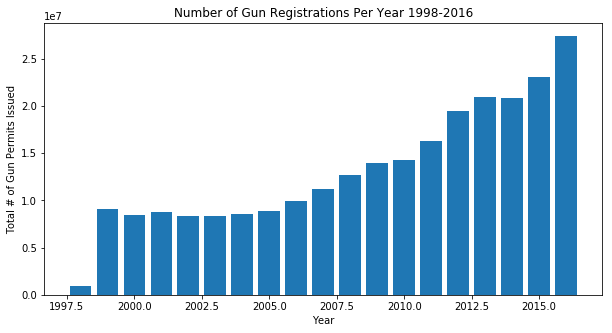

In [480]:
#create visualization in order to show total number of gun permits issued per year 
plt.subplots(figsize = (10,5))
plt.bar(total_gun['year'],total_gun['totals'])
plt.title('Number of Gun Registrations Per Year 1998-2016')
plt.xlabel('Year')
plt.ylabel('Total # of Gun Permits Issued')

Based off of our bar chart above, we can clearly see that there has been a trend of increased gun registration year-over-year. Without further analysis it is tough to say wether or not this trend can be attributed to a steady increase in population size or if there is another outside factor impacting the number of gun registrations. 

### 4. In states with the highest percentage of gun registration, what is the racial demographic breakdown? 

In order to find the racial demographic breakdown of states with the highest percentage of gun registration, I will create a dataframe of the sates with the hgihest per-capita gun ratio and visualize them using a stacked bar graph. 

In [481]:
#find the states with the highest per-capita gun ratio and create a dataframe out of those rows
high_gun_capita = gun_census.nlargest(5,'gun_per_capita_2016')

In [495]:
#create a list of column names that contain % of ethnic group data 
race_cols = ['White alone, percent, July 1, 2016,  (V2016)',
'Black or African American alone, percent, July 1, 2016,  (V2016)',
'American Indian and Alaska Native alone, percent, July 1, 2016,  (V2016)',
'Asian alone, percent, July 1, 2016,  (V2016)',             
'Two or More Races, percent, July 1, 2016,  (V2016)',
'Hispanic or Latino, percent, July 1, 2016,  (V2016)']

In [496]:
#create dataframe that contains the states with the highest per-capita gun ratio and holds the ethnic group data 
#for each state
race_high_cap = high_gun_capita[race_cols]

In [497]:
#reset index to make a non-named index value for use in visualization
race_high_cap.reset_index(level=0, inplace=True)

In [498]:
#rename columns so that it makes the visualization much easier to create
race_high_cap.rename(columns = {'index':'State'}, inplace = True)
race_high_cap.rename(columns = {race_cols[0]:'% White'}, inplace = True)
race_high_cap.rename(columns = {race_cols[1]:'% Black'}, inplace = True)
race_high_cap.rename(columns = {race_cols[2]:'% American Indian or Alaska Native'}, inplace = True)
race_high_cap.rename(columns = {race_cols[3]:'% Asian'}, inplace = True)
race_high_cap.rename(columns = {race_cols[4]:'% Two or More Races'}, inplace = True)
race_high_cap.rename(columns = {race_cols[5]:'% Hispanic or Latino'}, inplace = True)

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3027: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [499]:
race_high_cap

,State,% White,% Black,% American Indian or Alaska Native,% Asian,% Two or More Races,% Hispanic or Latino
0,Kentucky,88.000000,8.3,0.3,1.5,1.9,3.5
1,Indiana,85.599998,9.7,0.4,2.2,2.0,6.8
2,Illinois,77.199997,14.7,0.6,5.5,1.9,17.0
3,West Virginia,93.599998,3.6,0.2,0.8,1.7,1.5
4,Montana,89.199997,0.6,6.6,0.8,2.7,3.6


In [500]:
#transpose columns for visualization
transposed_race = race_high_cap.T

In [501]:
#reset index values of newly transposed data frame
transposed_race.reset_index(level=0, inplace=True)

In [502]:
#create headers from first row to use as column names
state_headers = transposed_race.iloc[0]

In [503]:
#create new dataframe from transposed data that does include the first row
t_race = transposed_race[1:]

In [504]:
#rename the columns using the first row of transposed data set which contains state names
t_race.rename(columns = state_headers, inplace = True)

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3027: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [505]:
#rename the columm that says state to race 
t_race.rename(columns = {'State':'Race'}, inplace = True)

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3027: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [506]:
t_race

,Race,Kentucky,Indiana,Illinois,West Virginia,Montana
1,% White,88,85.6,77.2,93.6,89.2
2,% Black,8.3,9.7,14.7,3.6,0.6
3,% American Indian or Alaska Native,0.3,0.4,0.6,0.2,6.6
4,% Asian,1.5,2.2,5.5,0.8,0.8
5,% Two or More Races,1.9,2,1.9,1.7,2.7
6,% Hispanic or Latino,3.5,6.8,17,1.5,3.6


Text(0.5,1,'Demographic Breakdown of States with the Highest Per-Capita Gun Ratio')

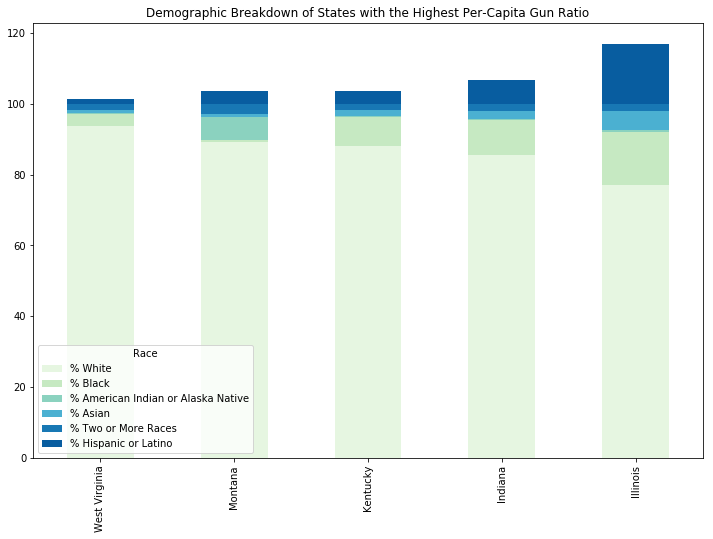

In [507]:
    #create a stacked bar graph for the demograpgic breakdown of these states with the highest per-capita gun ratio
    
    t_race.set_index('Race')\
      .reindex(t_race.set_index('Race').sum().sort_values().index, axis=1)\
      .T.plot(kind='bar', stacked=True,
              colormap=ListedColormap(sns.color_palette("GnBu", 10)), 
              figsize=(12,8)).set_title('Demographic Breakdown of States with the Highest Per-Capita Gun Ratio')

As we can see from both our dataframes and the visualization above, states with the highest per-capita gun ratio are pre-dominantly white, followed by black or hispanic. However, we can draw no conclusion about the demographic breakdown of each state and the per-capita gun ratio without coducting further statisical analysis. Additionally, we should note that for some of the states, the sum of percentages is greater than 100. In reviewing the data, it seems that this is common across the majority of states and it must be that in collecting census data there is some double counting of race for some individuals.

### 5. Does the percentage of college educated individuals in a given state impact the percentage of gun registrations?

In order to see if there is any relationship between the percentage of college educated individuals in a given state and the percentage of gun registration, I will analyze per-capita data for each state against the % of college educated residents.

Text(0.5,1,'% of College Graduates vs. Per-Capita Gun Data')

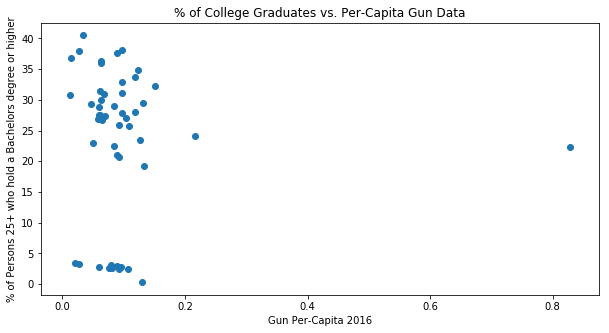

In [508]:
plt.subplots(figsize=(10,5))
plt.scatter(gun_census['gun_per_capita_2016'],gun_census["Bachelor's degree or higher, percent of persons age 25 years+, 2011-2015"])
plt.xlabel('Gun Per-Capita 2016')
plt.ylabel('% of Persons 25+ who hold a Bachelors degree or higher')
plt.title('% of College Graduates vs. Per-Capita Gun Data')


From our scatter plot above, there does not seem to be much correlation at all between gun registrations and the percentage of individuals who hold a bachelors degree or higher. However, without caluclating any further statistics on these two data points, it would be difficult to draw any significant conclusion.

<a id='conclusions'></a>
## Conclusions

> ### Question 1: 
>Based off of our correlation coeffcient calculations, we have concluded that the following facts shows the most associatation with high per-capita gun ratios:
>>With a disability, under age 65 years, percent, 2011-2015

>>Persons in poverty, percent

>>White alone, not Hispanic or Latino, percent, July 1, 2016,  (V2016) 

>>White alone, percent, July 1, 2016,  (V2016) 

>>Total employment, percent change, 2014-2015

> However, I will say that these calculations are fairly inconclusive given the low correlation coefficients. I am also additionally unsure if this was the best way to go about answering this question. 

> ### Question 2: 

>Based off of our percent change calculations for total permits issued in 2010 to 2018, the following states have experienced the highest growth in gun registrations in the United States:  

>>Indiana, Delaware, California, Wisconsin, and Illinois 

>>Based off these same calculations, the following states have experienced the least growth in gun registrations. 

>>Utah, Alaska, Wyoming, Montana and Kansas

>Calculations were only calculated between permits issued in 2010 and 2016 because that was the data used in calculating the per-capita gun ratios. Further analysis can be done by finding the percentage growth per year from 1968 onnward.

> ### Question 3: 
>Based off of our bar chart visualization, we can clearly see that there has been a trend of increased gun registration year-over-year. Without further analysis it is tough to say wether or not this trend can be attributed to a steady increase in population size or if there is another outside factor impacting the number of gun registrations. 

> ### Question 4: 
>As we can see from both the dataframes and the visualization created for this question, states with the highest per-capita gun ratio are pre-dominantly white, followed by black or hispanic. However, we can draw no conclusion about the demographic breakdown of each state and the per-capita gun ratio without conducting further statisical analysis.

> ### Question 5: 
>Our visualization shows that there is really no association between the % of college graduates in a given state and the per-capita gun ratio. 
